# 1.1 Example: Polynomial Curve Fitting


In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline


Suppose there are a training set $\textbf{x} \equiv (x_1, ..., x_N)^{T}$, and a target set $\textbf{t} \equiv (t_1, ..., t_N)^{T}$. They are all fit into a function:
$$
t = \sin(2\pi x) + \epsilon
$$,
in which the $\epsilon$ is a small level of random noice having a Gaussian distribution.

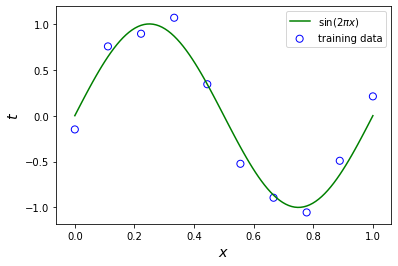

In [2]:
def create_data(sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_target = create_data(10, 0.15)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_target, facecolor="none", edgecolor="blue", s=50, label="training data")
plt.plot(x_test, y_test, c="green", label="$\sin(2\pi x)$")
plt.xlabel("$x$", fontsize="x-large")
plt.ylabel("$t$", fontsize="x-large")
plt.legend()

The goal is to predict $\hat{t}$ as a target variable by given some new value $\hat{x}$ as an input variable. And the method here can be used to solve this problem is called **polynomial curve fitting**, which is a function of the form
$$
y(x, \textbf{w}) = w_0 + w_1 x + w_2 x^2 + ... + w_M x^M = \Sigma^M_{j=0}w_j x^j
$$
in which $M$ is the *order* of the polynomial, and $x^j$ denotes $x$ rasised to the power of $j$, as well as $\textbf{w} \equiv (w_0, w_1, ..., w_M)$ is a vector used to represent the polynomial coefficients. These coefficients can be found by fitting the polynomial to the training data. In this case, it is to minimize an *error function*. The common error function is 
$$
E(\textbf{w}) = \frac{1}{2} \Sigma^N_{n=1} \{y(x_n, \textbf{w}) - t_n\}^2
$$
which is used to measures misfit between $y(x, \textbf{w})$ and target values $t_n$, and where the $\frac{1}{2}$ is included for later convenience. By the way, this error function will only print nonnegative quantity usually or zero iff $y(x, \textbf{w})$ passed through all training data points. 

The best way to solve this problem is choosing the value of $\textbf{w}$ as small as possible for $E(\textbf{w})$. And since $y(x, \textbf{w})$ is a quadratic function, it can be solved by finding derivatives with respect to the coefficients $\textbf{w}$ in which it should be linear and has a unique solution, denoted by $\textbf{w}^{*}$. It derives $y(x, \textbf{w}^{*})$. And another important task for solving this problem is to select the order $M$ of polynomial (*model comparison* or *model selection*). Let $M = 0,1,3,9$.

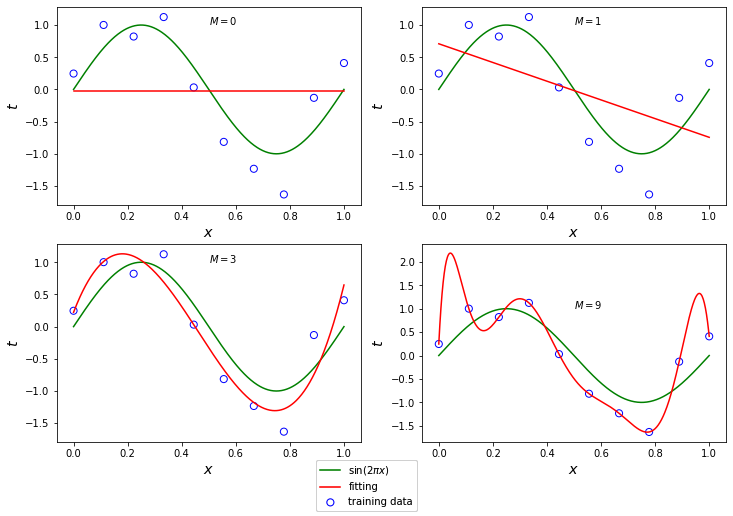

In [3]:
M = [0, 1, 3, 9]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

x_tr = np.linspace(0, 1, 10)
t_tr = np.sin(2*np.pi*x_tr) + np.random.randn(10)*0.35

for ax, degree in zip(axes, M):
    
    coeff = np.polyfit(x_tr, t_tr, degree)
    
    yfun = np.poly1d(coeff)
    
    xx = np.linspace(0, 1, 500)
    ax.scatter(x_tr, t_tr, facecolor="none", edgecolor="blue", s=50, label="training data")
    ax.plot(xx, np.sin(2*np.pi*xx), "g", label="$\sin(2\pi x)$")
    ax.plot(xx, yfun(xx), 'r', label="fitting")
    ax.set_xlabel("$x$",fontsize="x-large")
    ax.set_ylabel("$t$",fontsize="x-large")
    ax.annotate('$M={}$'.format(degree), xy=(0.5,1))
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower center")

Order $M = 3$ seems the best fit to the function $2\pi x$, and order $M = 9$ is actually called *over-fitting*.

For making better predictions, we can use a separate test set to generate the trainning set but with new random noise values. Thus, we can evaluate the residual value of $E(\textbf{w}^{*})$ for training data and also evaluate another $E({\textbf{w}^{*}})$ for the test data set. The method here can be used is **root-mean-square** error
$$
E_{RMS} = \sqrt{2E({\textbf{w}^{*}})/N}
$$
in which the $N$ allows us to compare different sizes of data sets on an equal footing, and the square root ensures that $E_{RMS}$ is measured on the same scale and in the same units as the target variable $t$.

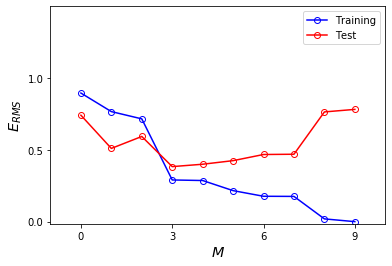

In [4]:
x_te = np.random.rand(100)
t_te = np.sin(2 * np.pi * x_te) + 0.25 * np.random.randn(100)
rms_ta, rms_te = [], []

for degree in range(10):
    coeff = np.polyfit(x_tr, t_tr, degree)
    
    yfun = np.poly1d(coeff)
    
    rms_ta.append(np.sqrt(((yfun(x_tr) - t_tr) ** 2).sum() / x_tr.shape[0]))
    rms_te.append(np.sqrt(((yfun(x_te) - t_te) ** 2).sum() / x_te.shape[0]))
    
fig, ax = plt.subplots()

ax.plot(range(10), rms_ta, "bo-", range(10), rms_te, "ro-", mfc="none")
ax.set_xlim(-1, 10)
ax.set_ylim(-0.015, 1.5)
ax.set_xticks(range(0, 10, 3))
ax.set_yticks([0, 0.5, 1])
ax.set_xlabel("$M$", fontsize="x-large")
ax.set_ylabel("$E_{RMS}$", fontsize="x-large")
ax.legend(["Training", "Test"], loc="best")

In the graph above, the training set error goes to zero when $M = 9$ (over-fitting). It means that all 10 coefficients $w_0,...w_9$ can be tuned exactly to the 10 data points in the set. However, the test set error shows really strange performance. It is because of the over-fitting, and the coefficients of test error set have to be dramatic to fit these orders ($M=9$).

In [5]:
for i, w in enumerate(np.polyfit(x_tr, t_tr, 9)):
    print("w_{}: {:.2f}".format(9-i,w))

w_9: 14328.36
w_8: -80257.89
w_7: 184712.90
w_6: -228146.04
w_5: 164757.11
w_4: -70644.14
w_3: 17340.76
w_2: -2203.81
w_1: 112.90
w_0: 0.25


Additionally, for a given model complexity, the size of data set increases, the over-fitting problem appears less often.

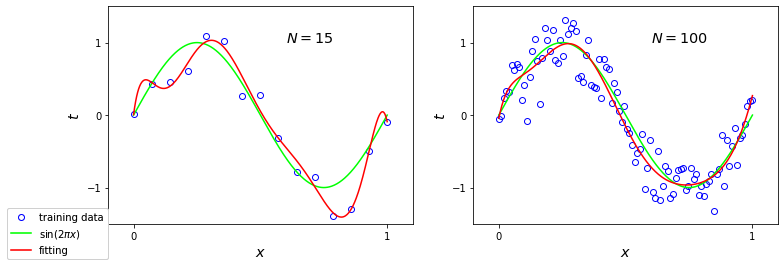

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes = axes.flatten()

for ax, N in zip(axes, (15, 100)):
    x_tr = np.linspace(0, 1, N)
    
    t_tr = np.sin(2 * np.pi * x_tr) + 0.25 * np.random.randn(N)
    
    coeff = np.polyfit(x_tr, t_tr, degree)
    yfun = np.poly1d(coeff)
    
    xx = np.linspace(0, 1, 500)
    ax.plot(x_tr, t_tr, 'bo', mfc="none", label="training data")
    ax.plot(xx, np.sin(2*np.pi*xx), "lime", label="$\sin(2\pi x)$")
    ax.plot(xx, yfun(xx), 'r', label="fitting")
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xticks([0,1])
    ax.set_yticks([-1, 0, 1])
    ax.set_xlabel("$x$", fontsize="x-large")
    ax.set_ylabel("$t$", fontsize="x-large")
    ax.text(0.6, 1, "$N={}$".format(N), fontsize="x-large")
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower left", borderaxespad=0.7)

It is easy to see that as the data size $N = 100$, the over-fitting problem will become rare. Furthermore, if we really need to pratice a data set with limited size in a limited degree model, *regularization* is a technique that can be used to control the over-fitting phenomenon. Regularization can control the range of coefficients from reaching large values by adding a penalty term to the error function.
$$
\tilde E(\textbf{w}) = \frac{1}{2} \Sigma^{N}_{n=1} \{y(x_n, \textbf{w} - t_n)\}^{2} + \frac{\lambda}{2} \| \textbf{w} \| ^{2}
$$
